## SLU07 - Advanced Statistics: Learning notebook

In this notebook we will cover the following:

- Probability Distributions

    - Normal
    - Binomial
    - Geometric
    - Exponential
    - Poisson
    - Student's T
    
- Skew
- Kurtosis

- Point estimates
- Confidence intervals

- Significance tests


## Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# this allows us to see our plots in the notebook:
% matplotlib inline

A probability distribution is a mathematical function that describes the values (and the respective probabilities) that a random variable can assume.

Now that sounds scary, but this is not your average statistics class! We're not gonna ask you to memorize these formulas. You'll just need to know:

> 1. What distribution you're looking at
> 2. What functions you can use

To do all of this programatically, we'll use a library called [SciPy](https://www.scipy.org/), which has a really cool statistics module.

In [59]:
import scipy.stats as stats

___________

# Normal Distribution

The normal distribution is a continous probability distribution, and its the most common distribution you'll find. 

It describes well a lot of random phenomenons, such as human height.

The notation is:


# $ {\mathcal {N}}(\mu ,\sigma ^{2}) $


The parameters are just: 


### $ mean = {\mathcal \mu \in \mathbb {R} } $
### $ variance = { \sigma ^{2}>0} $

### Example
Let's model the height of men worldwide.

We know that human height is normally distributed, so our choice of using a normal distribution is solid.

We just need the parameters, which are:

> $\mathcal \mu$ = 174 cm

> $\sigma ^{2}$ = $ 8.2 ^ {2}$ cm


So our normal distribution is:
## $ {\mathcal {N}}(174, 67.24) $

Let's generate some 10000 datapoints from this distribution.
Since we are using a normal distribution, we'll use `stats.norm`. 

We'll use its `.rsv` method to generated some data from this dristribution. You can see that here, `loc` is the mean, and `scale` is the standard deviation (which gets squared by the function)

In [84]:
normal_data = stats.norm.rvs(size=10000, loc=174, scale=8.2, random_state=0)

Let's plot it!

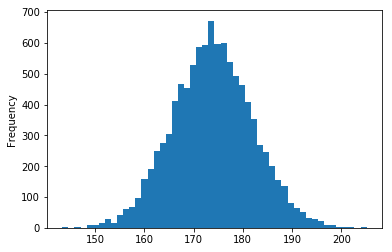

In [85]:
pd.Series(normal_data).plot(kind="hist", bins=50)

You can see the distictive bell-shape. The height of most men sits around in the center, with the extreme values being rarer.

Now that we have the distribution, we can use some functions to gain insights.

## Cumulative distribution function: `.cdf()`

This function tells us the probability that the random variable will assume a value less than the one you provide.

Hugo is 193 cm tall. What percentage of men are shorter than him?

In [119]:
stats.norm.cdf(x=193,         # Cutoff value (quantile) to check
               loc=174,       # Mean
               scale=8.2)     # Standard Deviation

0.989750126890689

He's taller than almost 99% of men!

## Percent point function: `.ppf()`

This function is the inverse of `.cdf()`; Instead of inputing a quantile and reciveing a probablity, we input a probability and recieve a quantile.

Below which height are 90% of men?

In [87]:
stats.norm.ppf(q=0.9,       # Cutoff value (quantile) to check
               loc=174,     # Mean
               scale=8.2)   # Standard Deviation

184.5087228374657

This means that 90% of men are under 184.5 cm of height.

## Probability density function: `.pdf()`

This function gives us the relatively likelihood of the random variable assuming a certain value.

For example, the relative likelihood of a randomly chosen man from this population being 170 cm tall:

In [131]:
stats.norm.pdf(x=170,         # Value to check
               loc=174,       # Distribution start
               scale=8.2)     # Distribution end

0.04319418121078366

And now the relative likelihood of a randomdly chosen man from this population being 150 cm tall:


In [132]:
stats.norm.pdf(x=150,         # Value to check
               loc=174,       # Distribution start
               scale=8.2)     # Distribution end

0.0006713382361063932

You can think of these values as the probability density at value: it's more likely for a man to be 170 cm tall as opposed to 150 cm tall.

___________

# Binomial Distribution

The binomial distribution is a discrete probability distribution that models the number of sucesses in a set of independent trials.

It describes random phenomenenon such as the number of heads you'll get, when you flip a coin a number of times.

The notation is: 

# $ B(n, p) $

The parameters are just: 
 
### $ n ∈ N0 $ - number of  trials

### $ p ∈ [0,1] $ - success probability in each trial

### Example
Let's model the number of heads we get when we flip a coin 10 times. This is a fair coin, so the chance of getting heads at each trial is 50%.

So our parameters are:

> n = 10

> p = 0.5


So our binomial distribution is:
## $ B(10, 0.5) $

Let's generate some 10000 datapoints from this distribution. 
This means we'll performing 10000 experiments, in which we flip a coin 10 times.

Since we are using a binomial distribution, we'll use `stats.binom`. 

We'll use its `.rsv` method to generated the data. You can see that here, `n` is the number of trials, and `p` is the probability of success in each trial.

In [90]:
binomial_data = stats.binom.rvs(size=10000, n=10, p=0.5, random_state=0)

Let's plot it!

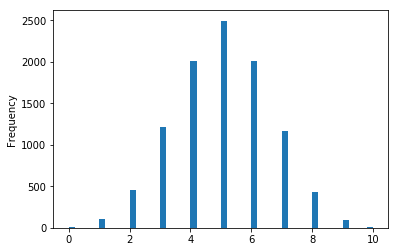

In [112]:
pd.Series(binomial_data).plot(kind="hist", bins = 50)

Now, unlike the normal distribution, this is a discrete distribution, meaning that the random variable can only assume discrete integer values. It does however sort of look like a normal distribution, in the sense that it is symmetric, but that changes when you use a `p` different from 0.5.

Let's now toss a biased coin. This a coin that is more likely to land on heads than tails.

In [117]:
biased_coin_data = stats.binom.rvs(size=10000, n=10, p=0.8, random_state=0)

And let's plot it.

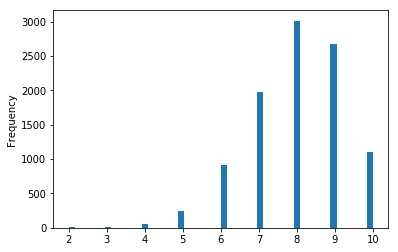

In [118]:
pd.Series(biased_coin_data).plot(kind="hist", bins=50)

You can see that this biased coin is more likely to get more heads in 10 trials than the fair coin. The distribution "shifted" to the right, so to speak.

Let's now use some functions to gain insights.

## Cumulative distribution function: `.cdf()`

This function tells us the probability that the random variable will assume a value less (or equal) to the one you provide.

Let's find out the probability of getting 7 heads in 10 trials, with this biased coin.


In [120]:
stats.binom.cdf(k=7,        # Probability of k = 7 heads or less
                n=10,       # In 10 trials
                p=0.8)      # And success probability 0.8

0.3222004736

If you want to ask the question "what is the probablity of getting at least 7 heads in 10 trails?", you are actually asking "What is the probability of NOT getting 6 or less heads in 10 trials". 

We express the "NOT" by subtracting the probability from 1, like this:

In [121]:
1 - stats.binom.cdf(k=6,        # Probability of k = 6 heads or less
                    n=10,       # In 10 trials
                    p=0.8)      # And success probability 0.8

0.8791261184000001

## Probability mass function: `.pmf()`

Before, we used `.pdf()` to check the probability density on a certain point of a continuous probability density function. However, the binomial distribution is a discrete probability distribution, so instead we use `.pmf()` to check the proportion of observations at a certain point.

Let's find out the probability of getting __exactly__ 5 heads in 10 trails, on our biased coin.

In [127]:
stats.binom.pmf(k=5,        # Probability of k = 5 heads
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.5

0.02642411520000004

#  Geometric Distribution and Exponential distribution

These distributions are useful when you want to model the time it takes for an event to occur.

The geometric distribution is a discrete distribution, and it's useful for modelling things like number of times you need to flip a coin before you see heads.

The exponential distribution is its continuous analogue, and it's useful for modelling things like the time you need to wait before your bus arrives, knowing that there is a bus every 15 minutes.

While these distributions are useful, we have a lot of ground to cover so we can't explain them here.

Refer to these resources if you later want to learn more about them:

# Poisson Distribution

This distribution is useful when you want to model the probability of the number of times an event is likely to occur, within a certain timeframe.

It's useful to model things such as the number of pacients an hospital will recieve within an hour.

While also a very useful distribution, we have a lot to cover, so I leave it up to you to learn more about it if you want.

## Point estimates

We need to know 2 important concepts:

> 1. Population
> 2. Sample

Imagine you're selling a product, and your product is in fact so popular, that you have tens of thousands of customers. Now, you'd like to know more about your customers, like what their average age is.

Now, if we could reach out to every single one of your customers and ask them their age, we could calculate the __Population mean__.

But since we can't do that, we have to settle for asking a sample of costumers their age, and calculating the __Sample mean__.

What this means, is that we can use the __Sample mean__ to estimate the __Population mean__.

Let's give it a try:

In [176]:
np.random.seed(3)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = pd.Series(np.concatenate((population_ages1, population_ages2)))


In [177]:
population_ages.mean()

42.995484

In [182]:
age_sample = population_ages.sample(500, random_state=0)
age_sample.mean()

42.654

Not too bad, right? With just 500 people, we get a pretty good idea of the mean age of our population 

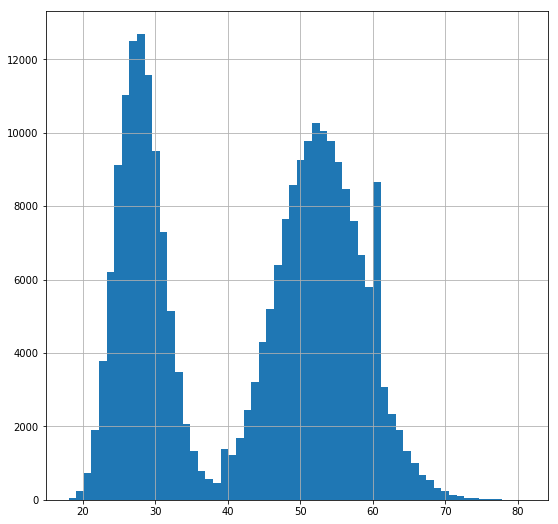

In [173]:
pd.Series(population_ages).hist(bins=60, figsize=(9,9))

In [168]:
## Point Estimates and Confidence Intervals

TODO: Here we talk about:
* Sampling distributions
* Central limit theorem
* Calculate Confidence interval for the mean using Student's T distribution


SyntaxError: invalid syntax (<ipython-input-168-62d2bf405d03>, line 3)

## Hypothesis testing


TODO: here we explain the framework of hypothesis testing; We focus on the idea of "how unlikely is this event to happen by chance", so that we can explain rejecting the null hypothesis as "it is very unlikely for this to happen by pure chance, so there's likely a change"

## T-test

TODO: Explain the T-test as a way to test the difference of means; for example, do these 2 groups of people have the same age on average?

## Chi-squared test

TODO: Explain the Chi-squared test as a way to test if frequencies between categories are the same or not; for example, do these 2 groups of people share the same frequency in the categories of a categorical variable? 

## Binomial Distribution

TODO: Quick explaination of the Binomial Distribution

## Binomial test (?)

## Poisson Distribution
TODO: Quick explaination of the Poisson Distribution

## A/B testing

TODO: Brief description of the method, but more of a warning regarding common pitfalls. Explain that it can't be covered in this learning unit, and refer to sources for learning, such as: https://eu.udacity.com/course/ab-testing--ud257-certified